In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import *

In [3]:
views = pd.read_csv('data/Philo_en.csv')
views

,project,article,timestamp,views
0,en.wikipedia,Absurdism,2019060100,1021
1,en.wikipedia,Absurdism,2019060200,1204
2,en.wikipedia,Absurdism,2019060300,1341
3,en.wikipedia,Absurdism,2019060400,1524
4,en.wikipedia,Absurdism,2019060500,1397
...,...,...,...,...
248400,en.wikipedia,Zurvanism,2020122800,180
248401,en.wikipedia,Zurvanism,2020122900,170
248402,en.wikipedia,Zurvanism,2020123000,151
248403,en.wikipedia,Zurvanism,2020123100,147


## Try to look at seasonality effects 

In [ ]:
dates = pd.read_csv('data/interventions.csv')

### Did covid have an impact globaly?

step 1: finding relevant dates for covid globaly: hard since it started everywhere differently, and wikipedia doesn't allow for more filtering than language, which may lead to biasses due to locality. However, since covid was a global event, we will disregard this effect, and take arbitrary date values: First death on each continent, mean school closure, mean banned public event, mean lockdown, mean mobility stop, and mean return to normal, with first less restriction, then complete stop of any covid measures.

In [22]:
dates=pd.DataFrame(columns=['Africa','N_America','S_America','Asia','Europe','School_Closure','Public','Mobility','Normalcy_start','Normalcy_finish'])
dates.loc[0]=[2020020800,2020022900,2020031700,2020011100,2020021500,2020031500,2020031500,2020031500,2020061500,2021060100]
dates.head()


,Africa,N_America,S_America,Asia,Europe,School_Closure,Public,Mobility,Normalcy_start,Normalcy_finish
0,2020020800,2020022900,2020031700,2020011100,2020021500,2020031500,2020031500,2020031500,2020061500,2021060100


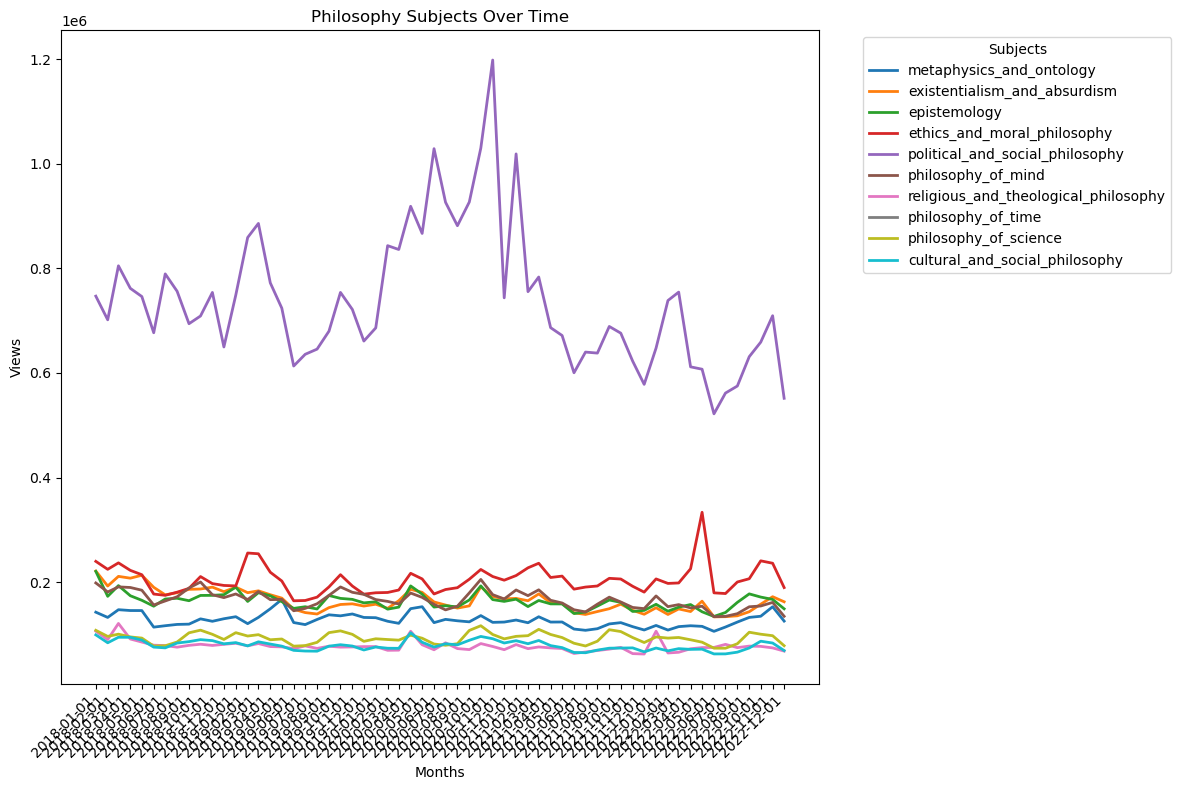

In [23]:
df = pd.read_csv('data/BroaderTopics_en.csv')
df=df.rename(columns={"Unnamed: 0": "date"})
df["date"] = pd.to_datetime(df["date"])

# Set the 'Unnamed: 0' column as the index if it represents the months
df.set_index("date", inplace=True)
# Plotting
#print(df['date'])
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Assuming you want a line plot for each subject without dots
for subject in df.columns:
    plt.plot(df.index, df[subject], label=subject, linewidth=2)  # Remove marker='o'

plt.title('Philosophy Subjects Over Time')
plt.xlabel('Months')
plt.ylabel('Views')

plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# Format x-axis as dates
plt.xticks(df.index, df.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [4]:
from statsmodels.tsa.seasonal import STL
from scipy import stats

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import *

In [6]:
views = pd.read_csv('data/df_en.csv')

In [7]:
views

,timestamp,Aesthetics,Agnosticism,Analytic philosophy,Anarchism,Anarchy,Animism,Asceticism,Atheism,Authoritarianism,...,Teleology,Theism,Theology,Thomism,Transhumanism,Utilitarianism,Vienna Circle,Vitalism,Zen,Zoroastrianism
0,2019060100,1456.0,2681.0,507.0,2176.0,1010.0,1277.0,1119.0,2274.0,949.0,...,551.0,649.0,918.0,325.0,1126.0,1738.0,202.0,350.0,1451.0,6305.0
1,2019060200,1627.0,3150.0,661.0,2909.0,1081.0,1494.0,1500.0,2771.0,1083.0,...,654.0,720.0,959.0,350.0,1239.0,2001.0,213.0,445.0,2934.0,8268.0
2,2019060300,1846.0,3419.0,600.0,2392.0,1134.0,1561.0,1376.0,2919.0,1152.0,...,749.0,702.0,1298.0,401.0,1255.0,2267.0,237.0,393.0,1685.0,6949.0
3,2019060400,1803.0,3655.0,677.0,2235.0,1119.0,1542.0,1257.0,3249.0,1352.0,...,700.0,783.0,1174.0,389.0,1580.0,2252.0,216.0,402.0,1747.0,5985.0
4,2019060500,2155.0,3175.0,670.0,2242.0,1137.0,1439.0,1351.0,2964.0,1214.0,...,797.0,694.0,2004.0,328.0,1331.0,2161.0,211.0,413.0,1822.0,5976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,2020122800,2167.0,3421.0,753.0,3079.0,1229.0,1803.0,1786.0,2828.0,1383.0,...,651.0,709.0,1032.0,379.0,1680.0,1707.0,187.0,378.0,1813.0,6178.0
577,2020122900,2328.0,3153.0,770.0,3030.0,1210.0,1804.0,1735.0,2708.0,1460.0,...,669.0,709.0,1034.0,336.0,1594.0,1952.0,147.0,374.0,1877.0,5958.0
578,2020123000,3490.0,3110.0,994.0,3166.0,1364.0,1570.0,1651.0,2620.0,1638.0,...,681.0,665.0,968.0,359.0,2143.0,2034.0,178.0,399.0,1843.0,5941.0
579,2020123100,1838.0,2866.0,675.0,2912.0,1142.0,1547.0,1489.0,2398.0,1303.0,...,564.0,505.0,912.0,306.0,1663.0,1493.0,172.0,368.0,1587.0,5648.0


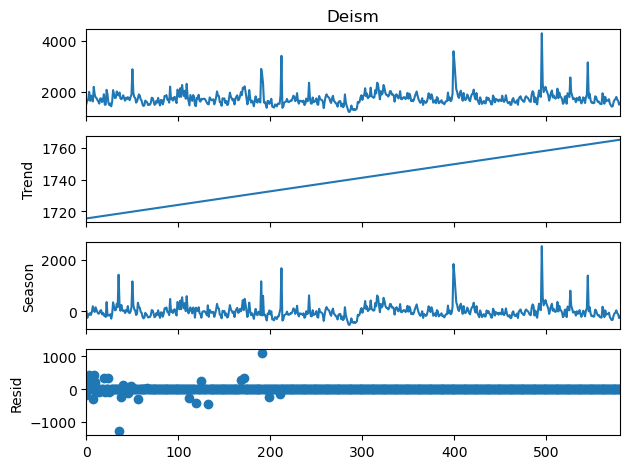

In [21]:
articles= views.columns[1:]
views['timestamp'] = pd.to_datetime(views['timestamp'],format='%Y%m%d%H')
#for article in articles[20:25] : 
    #print(article)
stl_after = STL(views['Deism'],robust=True,period=365)
res_after = stl_after.fit()
fig = res_after.plot()
    #plt.plot(views['timestamp'],views[article])
    #plt.title(article)
    #plt.xticks(rotation=45)
    #plt.show()
    #stl_before = STL(views[views['article']=='Absurdism']['views'][0:30], period=12, robust=True)
    #res_before = stl_before.fit()
    #fig = res_before.plot()
    #t_statistic, p_value = stats.ttest_ind(res_before.trend, res_after.trend)
    #print(p_value)



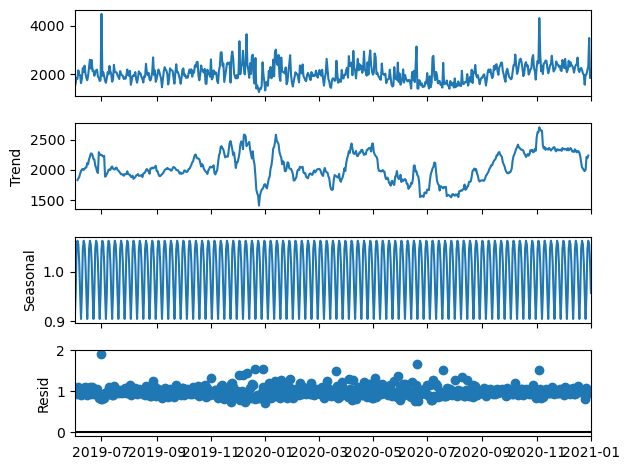

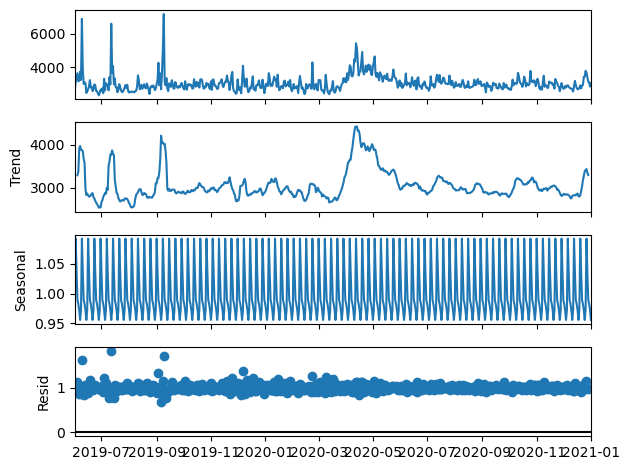

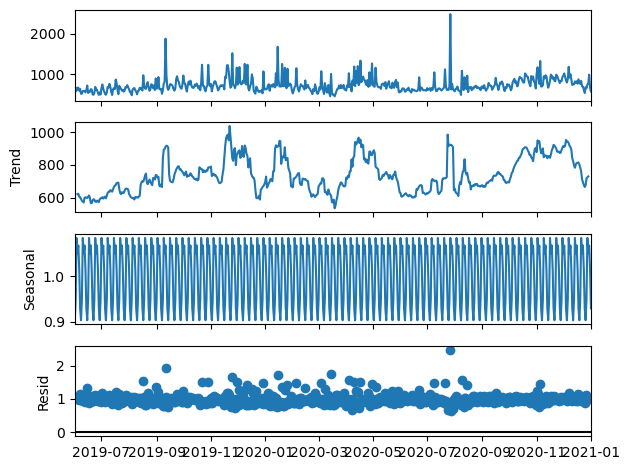

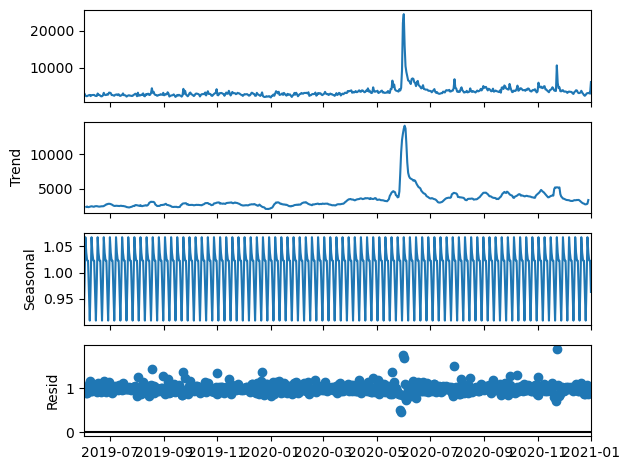

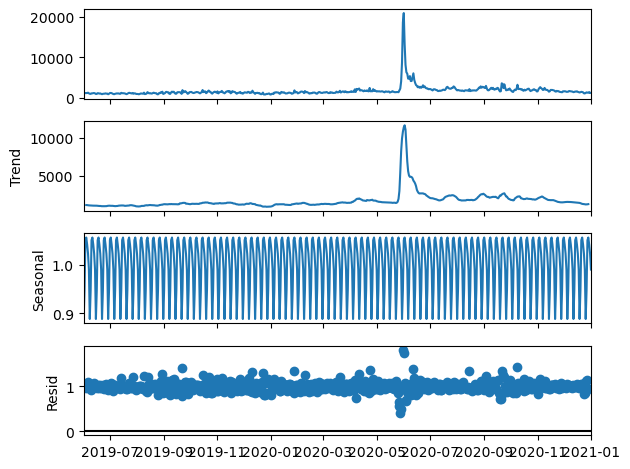

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
for article in articles[0:5] : 
    analysis = views[['timestamp',article]].copy()
    analysis.set_index('timestamp', inplace=True)

    decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    residual = decompose_result_mult.resid

    decompose_result_mult.plot();